In [1]:
import os
os.getcwd()

'C:\\Users\\Neha'

In [3]:
import sys
sys.executable

'C:\\Users\\Neha\\Anaconda2\\envs\\py36-test\\python.exe'

Automatically created module for IPython interactive environment


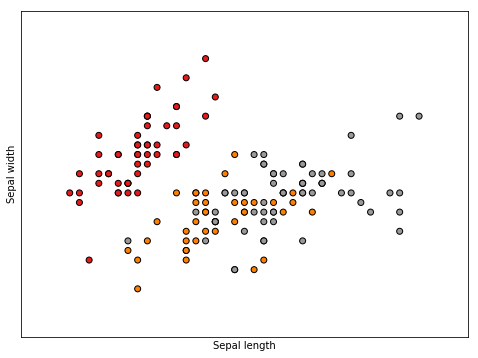

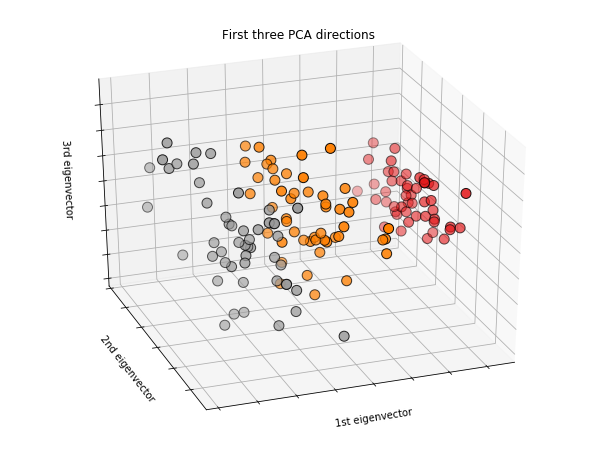

In [124]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
import numpy as np

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=100)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [50]:
type(iris)
import pandas as pd

In [51]:
irisdf = pd.DataFrame(iris.data, columns = ["Petal Length" , "Petal Width" , "Sepal Length" , "Sepal width"])

In [52]:
irisdf.head()

,Petal Length,Petal Width,Sepal Length,Sepal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [53]:
iristarget = pd.DataFrame(iris.target, columns = ["class"])

In [54]:
iristarget.head(n=5)

,class
0,0
1,0
2,0
3,0
4,0


In [98]:
print (iristarget['class'].count())
print (iristarget['class'].value_counts())

150
2    50
1    50
0    50
Name: class, dtype: int64


In [55]:
X_train, X_test, y_train, y_test = train_test_split(irisdf, iristarget, test_size=0.3, random_state=0)
X_train.shape, y_train.shape

((105, 4), (105, 1))

In [56]:
lr = LogisticRegression().fit(X_train, y_train.values.ravel())
lr.score(X_test, y_test, sample_weight=None)

0.8888888888888888

In [57]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train.values.ravel())
clf.score(X_test, y_test, sample_weight=None)

0.9777777777777777

In [58]:
from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier(loss="hinge", penalty="l2")
clf2.fit(X_train, y_train.values.ravel())
clf2.score(X_test, y_test, sample_weight=None)

C:\Users\Neha\Anaconda2\envs\py36-test\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.6

In [59]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf3 = NearestCentroid()
clf3.fit(X_train, y_train.values.ravel())
clf3.score(X_test, y_test, sample_weight=None)

0.9111111111111111

In [82]:
index_class0 = iristarget.loc[:,'class'] == 0
index_class1 = iristarget.loc[:,'class'] == 1
index_class2 = iristarget.loc[:,'class'] == 2
mean_class0 = irisdf.loc[iristarget.loc[:,'class'] == 0].mean()
mean_class1 = irisdf.loc[iristarget.loc[:,'class'] == 1].mean()
mean_class2 = irisdf.loc[iristarget.loc[:,'class'] == 2].mean()

In [84]:
mean_df = pd.concat([mean_class0, mean_class1, mean_class2], axis=1)

In [85]:
mean_df

,0,1,2
Petal Length,5.006,5.936,6.588
Petal Width,3.418,2.770,2.974
Sepal Length,1.464,4.260,5.552
Sepal width,0.244,1.326,2.026


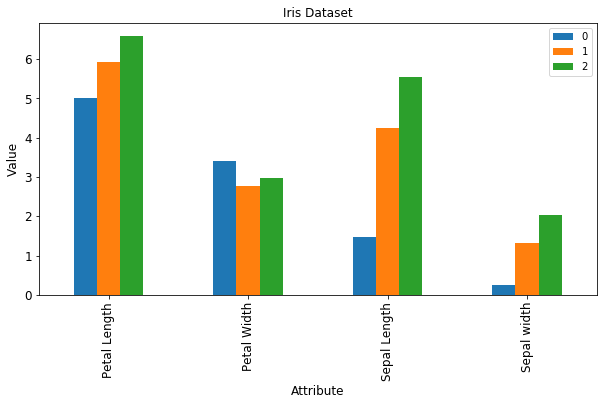

In [96]:
ax = mean_df.plot(kind='bar', title ="Iris Dataset", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Attribute", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
plt.show()

In [92]:
mean_df2 = mean_df.transpose()

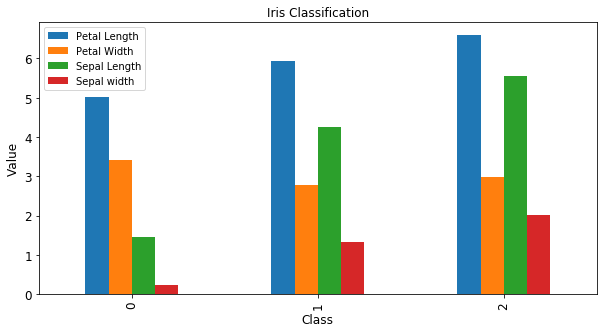

In [97]:
ax = mean_df2.plot(kind='bar', title ="Iris Classification", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Class", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
plt.show()

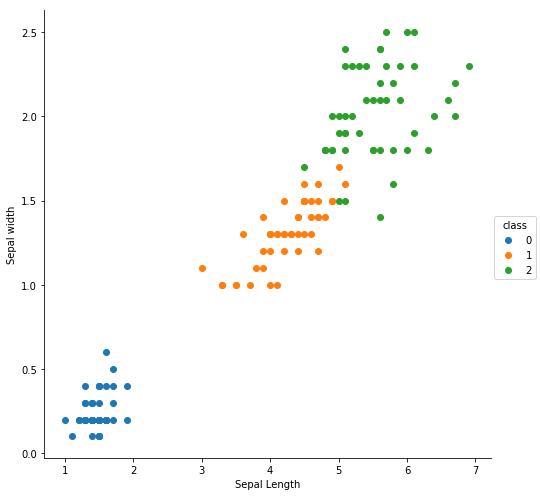

In [111]:
irisdfcombine = pd.concat([irisdf, iristarget], axis=1)
sns.FacetGrid(irisdfcombine, hue="class", size=7).map(plt.scatter, "Sepal Length", "Sepal width") \
   .add_legend()
plt.show()

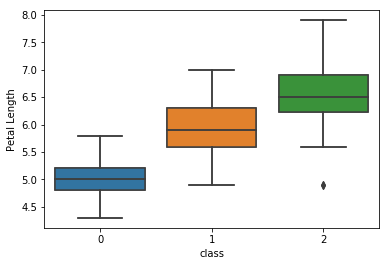

In [113]:
sns.boxplot(x="class", y="Petal Length", data=irisdfcombine)
plt.show()

In [121]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


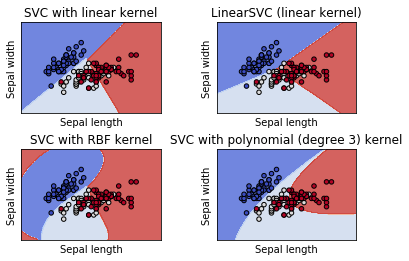

In [125]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(iris.data[:, :2], iris.target) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = iris.data[:, 0], iris.data[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()